In [ ]:
import pandas as pd
df = pd.read_csv('./df_with_type.csv')
df = df[['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
      'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
      'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
      'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
      'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
      'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
      'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
      'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
      'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
      'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
      'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
      'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
      'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
      'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
      'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
      'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
      'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
      'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
      'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
      'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']]

# Nan, inf, 1970, minus value remove
df = df[~df['Flow Byts/s'].isna()]
df = df[(df['Flow Byts/s']!=float('inf')) & (df['Flow Pkts/s']!=float('inf'))]
df = df[df['Flow Duration']>=0]  # 1970
df = df[df['Flow IAT Min']>=0]  # minus
df = df[df['Bwd Pkt Len Max']>=0]  # minus

# Benign / Not Benign
def func(x) :
    if x == 'Benign': return 0
    else : return 1
df['Type'] = df['Label'].apply(lambda x : func(x))

In [ ]:
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Type
0,0,0,112641719,3,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,56320860.0,139.30003,56320958.0,56320761.0,Benign,0
1,0,0,112641466,3,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,56320732.0,114.55130,56320814.0,56320652.0,Benign,0
2,0,0,112638623,3,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,56319310.0,301.93460,56319525.0,56319098.0,Benign,0
3,22,6,6453966,15,10,1239,2273.0,744,0,82.6,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0
4,22,6,8804066,14,11,1143,2209.0,744,0,81.6,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247867,0,0,118494070,31,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0
8247868,2634,6,114340,2,1,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0
8247869,3389,6,1404866,8,7,1132,1581.0,661,0,141.5,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0
8247870,3389,6,3966663,14,7,1386,392.0,680,0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0


In [ ]:
# index extraction
Normal_idx = df['Type'] == 0
Abnormal_idx = df['Type'] == 1

# normal / abnormal
Normal = df.loc[Normal_idx, :]
Abnormal = df.loc[Abnormal_idx, :]

In [ ]:
Normal

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Type
0,0,0,112641719,3,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,56320860.0,139.30003,56320958.0,56320761.0,Benign,0
1,0,0,112641466,3,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,56320732.0,114.55130,56320814.0,56320652.0,Benign,0
2,0,0,112638623,3,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,56319310.0,301.93460,56319525.0,56319098.0,Benign,0
3,22,6,6453966,15,10,1239,2273.0,744,0,82.6,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0
4,22,6,8804066,14,11,1143,2209.0,744,0,81.6,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247867,0,0,118494070,31,0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0
8247868,2634,6,114340,2,1,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0
8247869,3389,6,1404866,8,7,1132,1581.0,661,0,141.5,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0
8247870,3389,6,3966663,14,7,1386,392.0,680,0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0


In [ ]:
Abnormal

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Type
94,21,6,19,1,1,0,0.0,0,0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,1
95,21,6,3,1,1,0,0.0,0,0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,1
96,21,6,3,1,1,0,0.0,0,0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,1
97,21,6,2,1,1,0,0.0,0,0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,1
98,21,6,2,1,1,0,0.0,0,0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8211121,445,6,780351,5,3,53,131.0,53,0,10.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infilteration,1
8211122,3389,6,2937271,10,7,1148,1581.0,677,0,114.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infilteration,1
8211123,445,6,135614,3,1,0,0.0,0,0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infilteration,1
8211124,61209,6,27,2,0,0,0.0,0,0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infilteration,1


In [ ]:
# dataset 6000000
import random

X_normal = Normal.drop(columns=['Label', 'Type'])
y_normal = Normal['Type']
X_abnormal = Abnormal.drop(columns=['Label', 'Type'])
y_abnormal = Abnormal['Type']

In [ ]:
X_normal

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,0,112641719,3,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,56320860.0,139.30003,56320958.0,56320761.0
1,0,0,112641466,3,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,56320732.0,114.55130,56320814.0,56320652.0
2,0,0,112638623,3,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,56319310.0,301.93460,56319525.0,56319098.0
3,22,6,6453966,15,10,1239,2273.0,744,0,82.6,...,6,32,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,22,6,8804066,14,11,1143,2209.0,744,0,81.6,...,6,32,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247867,0,0,118494070,31,0,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
8247868,2634,6,114340,2,1,0,0.0,0,0,0.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
8247869,3389,6,1404866,8,7,1132,1581.0,661,0,141.5,...,5,20,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
8247870,3389,6,3966663,14,7,1386,392.0,680,0,99.0,...,7,20,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [ ]:
X_abnormal

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
94,21,6,19,1,1,0,0.0,0,0,0.00,...,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,21,6,3,1,1,0,0.0,0,0,0.00,...,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,21,6,3,1,1,0,0.0,0,0,0.00,...,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,21,6,2,1,1,0,0.0,0,0,0.00,...,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,21,6,2,1,1,0,0.0,0,0,0.00,...,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8211121,445,6,780351,5,3,53,131.0,53,0,10.60,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8211122,3389,6,2937271,10,7,1148,1581.0,677,0,114.80,...,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8211123,445,6,135614,3,1,0,0.0,0,0,0.00,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8211124,61209,6,27,2,0,0,0.0,0,0,0.00,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# columns categorizing
category_col = []
continuous_col = []
for col in X_normal.columns:
  if col in ['Dst Port', 'Protocol']:
    category_col.append(col)
  else:
    continuous_col.append(col)

print(f'category_col({len(category_col)}) : {category_col}')
print(f'continuous_col({len(continuous_col)}) : {continuous_col}')

category_col(2) : ['Dst Port', 'Protocol']
continuous_col(76) : ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 

In [ ]:
## Columns transform
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

All = pd.concat([X_normal, X_abnormal], axis=0)
All_label = pd.concat([y_normal, y_abnormal], axis=0)

# get_dummies
new_protocol = pd.get_dummies(All['Protocol'])
#new_port = pd.get_dummies(All['Dst Port'])

# minmaxscaler
continuous = All[continuous_col]
continuous_scaler = MinMaxScaler()
new_continuous = pd.DataFrame(continuous_scaler.fit_transform(continuous))

# final_df = pd.concat([new_protocol, new_port, new_continuous], axis=1)
#final_df = pd.concat([new_protocol, new_port, new_continuous], axis=1)
final_df = pd.concat([new_protocol, new_continuous], axis=1)

In [ ]:
final_df.head()

,0,6,17,0,1,2,3,4,5,6,...,66,67,68,69,70,71,72,73,74,75
0,1,0,0,0.938681,0.000006,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.469340,0.000002,0.469341,0.469340
1,1,0,0,0.938679,0.000006,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.469339,0.000002,0.469340,0.469339
2,1,0,0,0.938655,0.000006,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.469328,0.000004,0.469329,0.469326
3,0,1,0,0.053783,0.000045,0.000081,0.000009,0.000015,0.011546,0.0,...,0.000019,0.571429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0,1,0,0.073367,0.000042,0.000089,0.000008,0.000014,0.011546,0.0,...,0.000019,0.571429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [ ]:
columns_list = ['0', '6', '17', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [ ]:
final_df.columns = columns_list

In [ ]:
final_df

,0,6,17,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1,0,0,9.386810e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.469340,0.000002,0.469341,0.469340
1,1,0,0,9.386789e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.469339,0.000002,0.469340,0.469339
2,1,0,0,9.386552e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.469328,0.000004,0.469329,0.469326
3,0,1,0,5.378304e-02,0.000045,0.000081,8.580817e-06,1.453693e-05,0.011546,0.0,...,0.000019,0.571429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0,1,0,7.336721e-02,0.000042,0.000089,7.915959e-06,1.412762e-05,0.011546,0.0,...,0.000019,0.571429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247867,1,0,0,6.502917e-03,0.000013,0.000024,3.670567e-07,8.378079e-07,0.000822,0.0,...,0.000003,0.357143,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8247868,0,1,0,2.447725e-02,0.000029,0.000057,7.950587e-06,1.011125e-05,0.010506,0.0,...,0.000016,0.357143,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8247869,0,1,0,1.130108e-03,0.000006,0.000008,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.357143,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8247870,0,1,0,2.166667e-07,0.000003,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.357143,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [ ]:
X_normal = final_df.loc[Normal_idx, :]
X_abnormal = final_df.loc[Abnormal_idx, :]
print(len(X_normal), len(X_abnormal))
print(X_normal.shape, X_abnormal.shape)

6077129 2170743
(6077129, 79) (2170743, 79)


In [ ]:
from sklearn.model_selection import train_test_split
X_normal_train, X_normal_test, y_normal_train, y_normal_test = train_test_split(X_normal, 
                                                                                y_normal,
                                                                                test_size=0.2, 
                                                                                random_state=0)
X_abnormal_train, X_abnormal_test, y_abnormal_train, y_abnormal_test = train_test_split(X_abnormal, 
                                                                                        y_abnormal, 
                                                                                        test_size=0.2, 
                                                                                        random_state=0)

In [ ]:
from torch.utils.data import Dataset

# reset_index
def get_new_idx(data):
  data = data.reset_index().drop('index',axis=1)
  return data

# customize dataset
class CustomDataset(Dataset):
  def __init__(self, feature, label):
    self.feature = feature
    # idx = self.feature.index
    self.label = label

  def __len__(self):
    return len(self.feature)

  def __getitem__(self, index) : 
    feature = torch.from_numpy(self.feature.loc[index].values).float()
    label = torch.from_numpy(self.label.loc[index].values).float()
    
    return feature, label

In [ ]:
# reset index processing
train_data = get_new_idx(X_normal_train)
train_label = get_new_idx(y_normal_train)
test_raw_data = pd.concat([X_normal_test, X_abnormal_test])
test_raw_label = pd.concat([y_normal_test, y_abnormal_test])
test_data = get_new_idx(test_raw_data)
test_label = get_new_idx(test_raw_label)
print(len(train_data), len(train_label), len(test_data), len(test_label))

4861703 4861703 1649575 1649575


In [ ]:
print(len(train_data), len(train_label), len(test_data), len(test_label))

4861703 4861703 1649575 1649575


In [ ]:
train_data

,0,6,17,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,1,0,0.000000e+00,0.000000,0.000008,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.714286,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0,0,1,7.886417e-04,0.000003,0.000016,9.418814e-07,1.918644e-06,0.001055,0.046575,...,0.000003,0.142857,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0,1,0,5.006787e-01,0.000013,0.000032,1.350492e-06,1.072522e-05,0.003026,0.000000,...,0.000003,0.357143,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0,0,1,1.056833e-04,0.000000,0.000008,4.986431e-07,9.785085e-07,0.001117,0.049315,...,0.000000,0.142857,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0,1,0,2.358333e-06,0.000000,0.000008,2.978007e-07,3.773333e-07,0.000667,0.029452,...,0.000000,0.142857,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861698,0,0,1,3.500000e-07,0.000000,0.000008,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.357143,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4861699,0,1,0,1.308250e-04,0.000003,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.357143,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4861700,0,1,0,7.159771e-01,0.000003,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.357143,0.0,0.0,0.0,0.0,0.715977,0.0,0.715977,0.715977
4861701,0,1,0,1.434583e-04,0.000013,0.000016,6.475435e-06,1.861085e-06,0.014510,0.000000,...,0.000003,0.357143,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [ ]:
from torch.utils.data import DataLoader

# to_tensor and dataloader
BATCH_SIZE = 512
train_loader = DataLoader(CustomDataset(train_data, train_label), BATCH_SIZE, shuffle=True)
test_loader = DataLoader(CustomDataset(test_data, test_label), BATCH_SIZE, shuffle=True)

In [ ]:
import torch
for data in train_loader:
  BATCH_SIZE, FEATURE_NUM = data[0].shape
  break

print(BATCH_SIZE, FEATURE_NUM)

512 79


## Basic AE

In [ ]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# AutoEncoder
class AutoEncoder(nn.Module):
  def __init__(self, input_dim, output_dim, code_size=2):
    super(AutoEncoder, self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim

    self.encoder = nn.Sequential(
        nn.Linear(input_dim, code_size),
        nn.BatchNorm1d(2),
        nn.ReLU(),
    )

    self.decoder = nn.Sequential(
        nn.Linear(code_size, output_dim),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [ ]:
# Simple AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = AutoEncoder(input_dim=FEATURE_NUM,output_dim=FEATURE_NUM,code_size=2).to(DEVICE)
# loss function = Mean Squared Error(MSE)
criterion = nn.MSELoss()

# Configure the optimiser
learning_rate = 0.0008
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
DEVICE

device(type='cuda', index=0)

In [ ]:
from tqdm import tqdm
from collections import defaultdict
train_losses = []

minimum = float('inf')
dic = defaultdict(int)

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
  running_loss = 0
  model.train()
  for datas in train_loader:
    data, _ = datas
    data = data.to(DEVICE)
    data = data.float()
    # ===================forward=====================
    encoded,decoded = model.forward(data)
    loss = criterion(decoded, data)

    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()

    # Step backwards
    optimizer.step()
    running_loss += loss.item()
  val = running_loss/len(train_loader)
  train_losses.append(val)

  # Early stopping
  if np.round(val,4) <= minimum : 
    minimum = np.round(val,4)
    dic[minimum] += 1
    if dic[minimum] > 3 : 
      break
  # ===================log========================
  print(f'epoch [{epoch + 1}/{num_epochs}], train loss:{val:.4f}')

 10%|███████▉                                                                       | 1/10 [18:36<2:47:26, 1116.33s/it]

epoch [1/10], train loss:0.0261


 20%|███████████████▊                                                               | 2/10 [37:01<2:27:59, 1109.92s/it]

epoch [2/10], train loss:0.0074


 30%|███████████████████████▋                                                       | 3/10 [55:25<2:09:11, 1107.30s/it]

epoch [3/10], train loss:0.0067


 40%|██████████████████████████████▊                                              | 4/10 [1:13:51<1:50:40, 1106.69s/it]

epoch [4/10], train loss:0.0065


 50%|██████████████████████████████████████▌                                      | 5/10 [1:32:19<1:32:15, 1107.05s/it]

epoch [5/10], train loss:0.0064


 60%|██████████████████████████████████████████████▏                              | 6/10 [1:50:39<1:13:38, 1104.62s/it]

epoch [6/10], train loss:0.0064


 70%|███████████████████████████████████████████████████████▎                       | 7/10 [2:08:58<55:08, 1102.81s/it]

epoch [7/10], train loss:0.0064


 80%|███████████████████████████████████████████████████████████████▏               | 8/10 [2:27:19<36:44, 1102.14s/it]

epoch [8/10], train loss:0.0063


 90%|███████████████████████████████████████████████████████████████████████        | 9/10 [2:45:39<18:21, 1101.45s/it]

epoch [9/10], train loss:0.0063


100%|██████████████████████████████████████████████████████████████████████████████| 10/10 [3:03:58<00:00, 1103.85s/it]

epoch [10/10], train loss:0.0063


In [ ]:
# code_size = 2
# train_loss collection
from tqdm import tqdm
model.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

100%|██████████████████████████████████████████████████████████████████████████████| 9496/9496 [42:01<00:00,  3.77it/s]


4861703

In [ ]:
# code_size = 2
# model

# threshold
import numpy as np
threshold = list(set(np.percentile(train_loss_collection, range(0, 101, 10))))

from tqdm import tqdm
model.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(test_loader): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try : 
    acc = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)
    test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
  except : 
    continue
  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████████████████████████████████████████████████████████████████████████| 3222/3222 [14:34<00:00,  3.68it/s]


,tp,fp,tn,fn,acc,f1,precision,recall
0.000076,434149,1215426,0,0,0.263188,0.416705,0.263188,1.0
0.000158,388323,1093971,121455,45826,0.309036,0.405254,0.261974,0.894446
0.000591,354038,971810,243616,80111,0.362308,0.402317,0.267028,0.815476
0.000631,330820,850023,365403,103329,0.422062,0.409686,0.280156,0.761996
0.000898,238632,606900,608526,195517,0.513561,0.372955,0.282227,0.549655
0.003681,111351,364400,851026,322798,0.583409,0.244754,0.234053,0.256481
0.010093,58733,243053,972373,375416,0.625074,0.159615,0.194618,0.135283
0.023930,21437,121881,1093545,412712,0.675921,0.074245,0.149576,0.049377
0.178395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.001397,199889,485240,730186,234260,0.563827,0.357175,0.291754,0.460416


In [ ]:
torch.save(model, './SimpleAE_code2_B512_E10_model_all_data_80000.pt')

In [ ]:
test_result[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']] = test_result[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']].apply(pd.to_numeric)

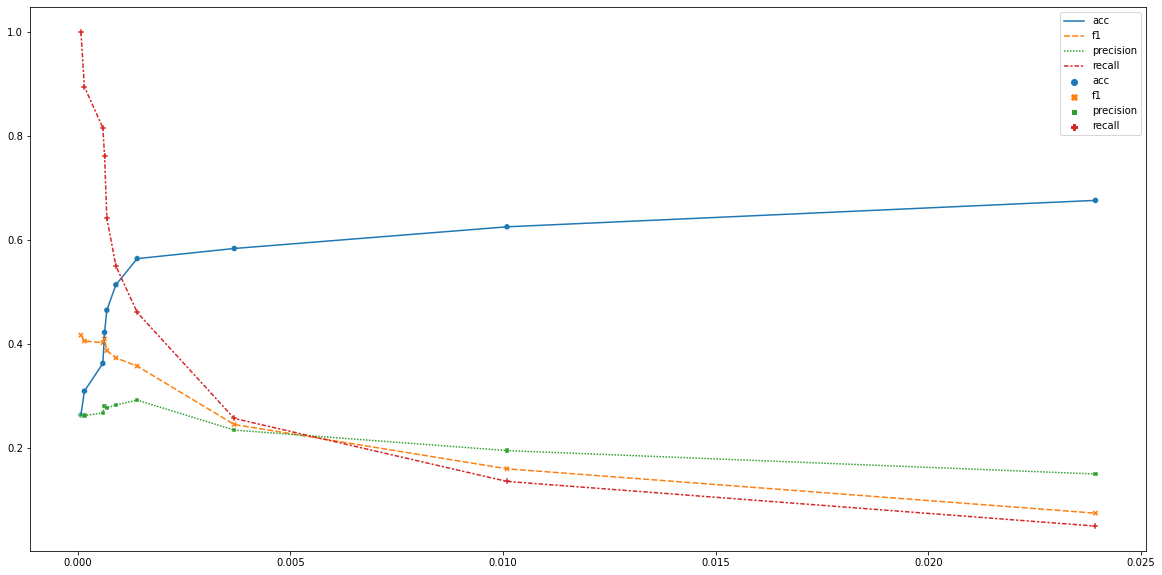

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


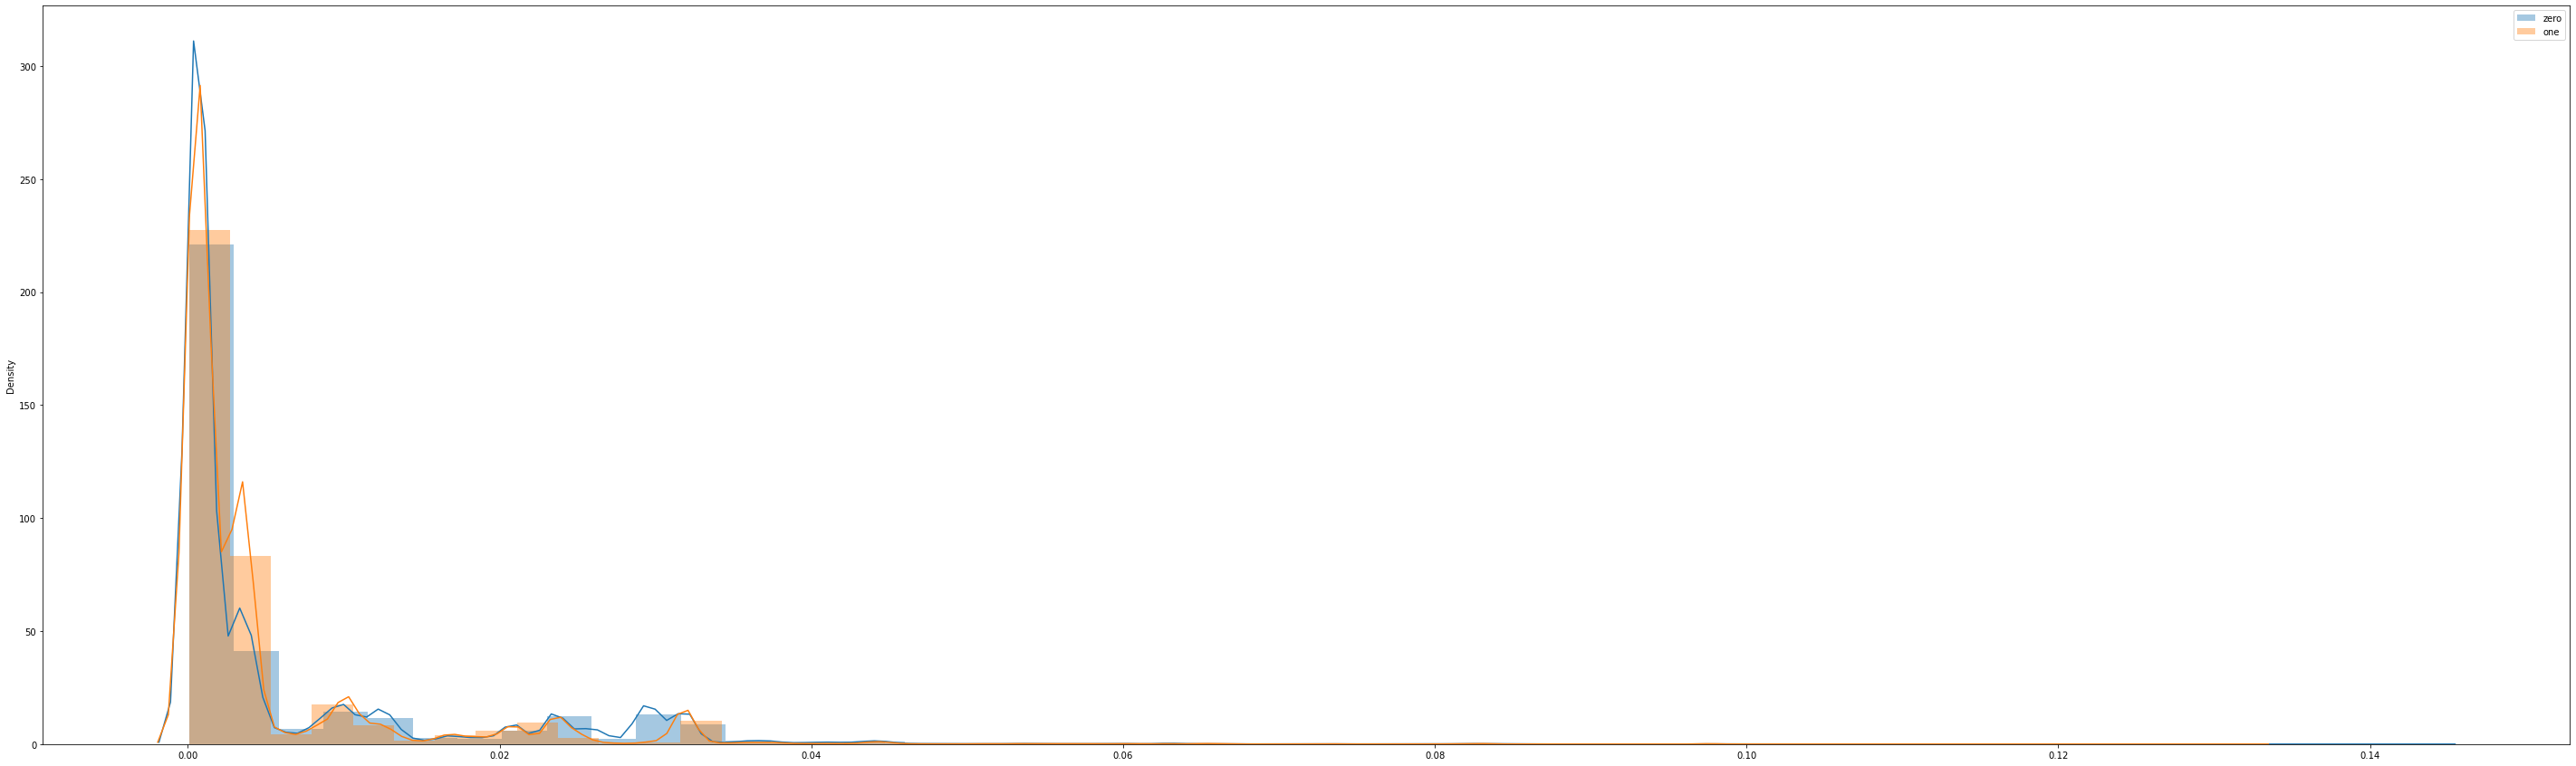

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 15))
sns.distplot(zero1, label='zero')
sns.distplot(one1, label='one')
plt.legend()
plt.show()

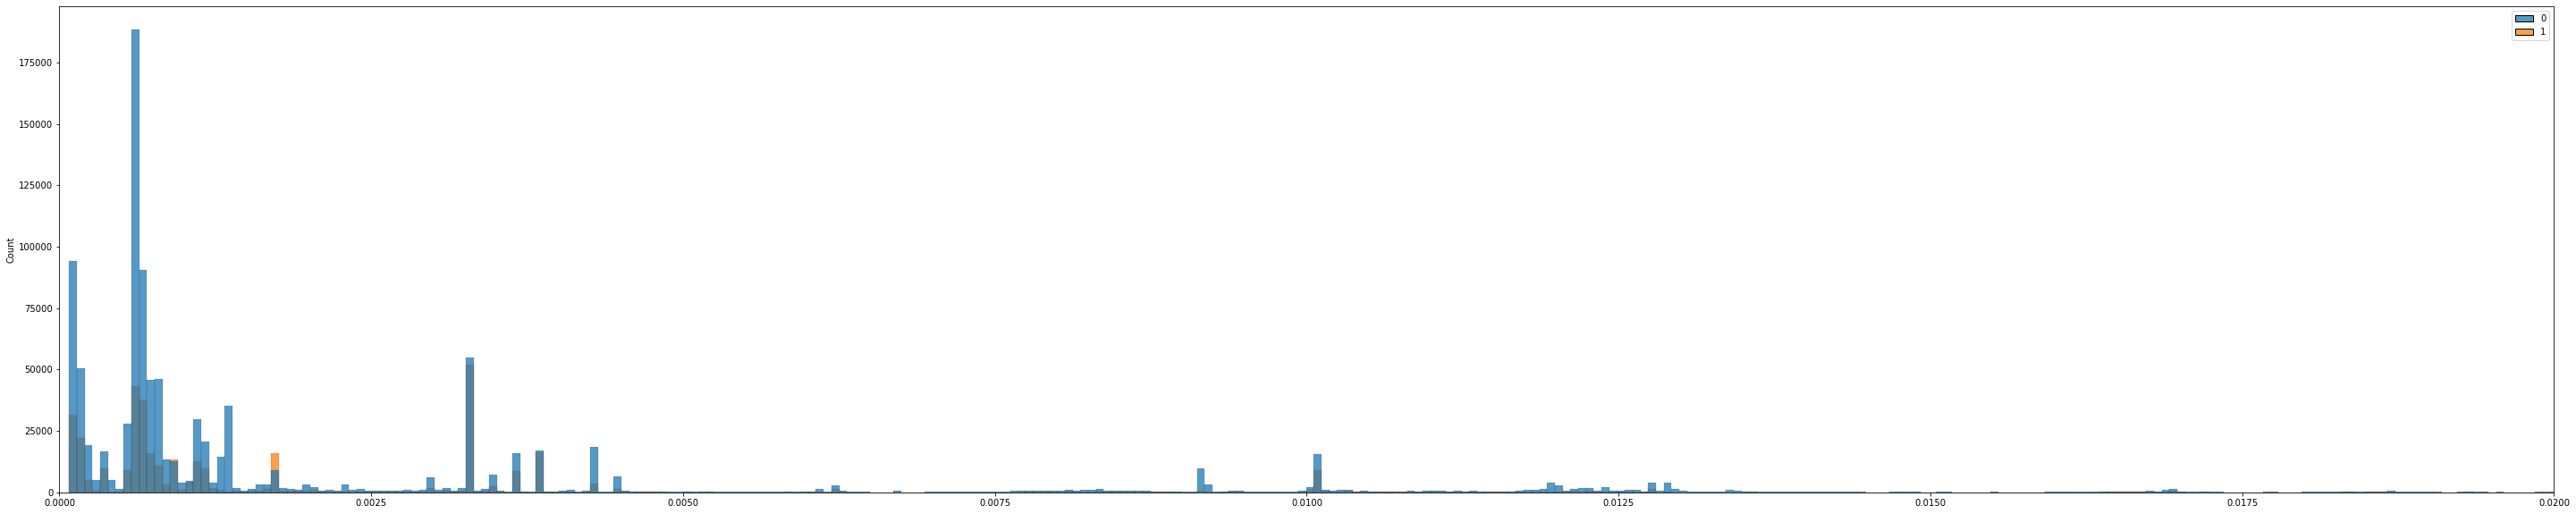

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.histplot([zero1, one1])
# plt.legend()
plt.xlim(0, 0.02)
plt.show()

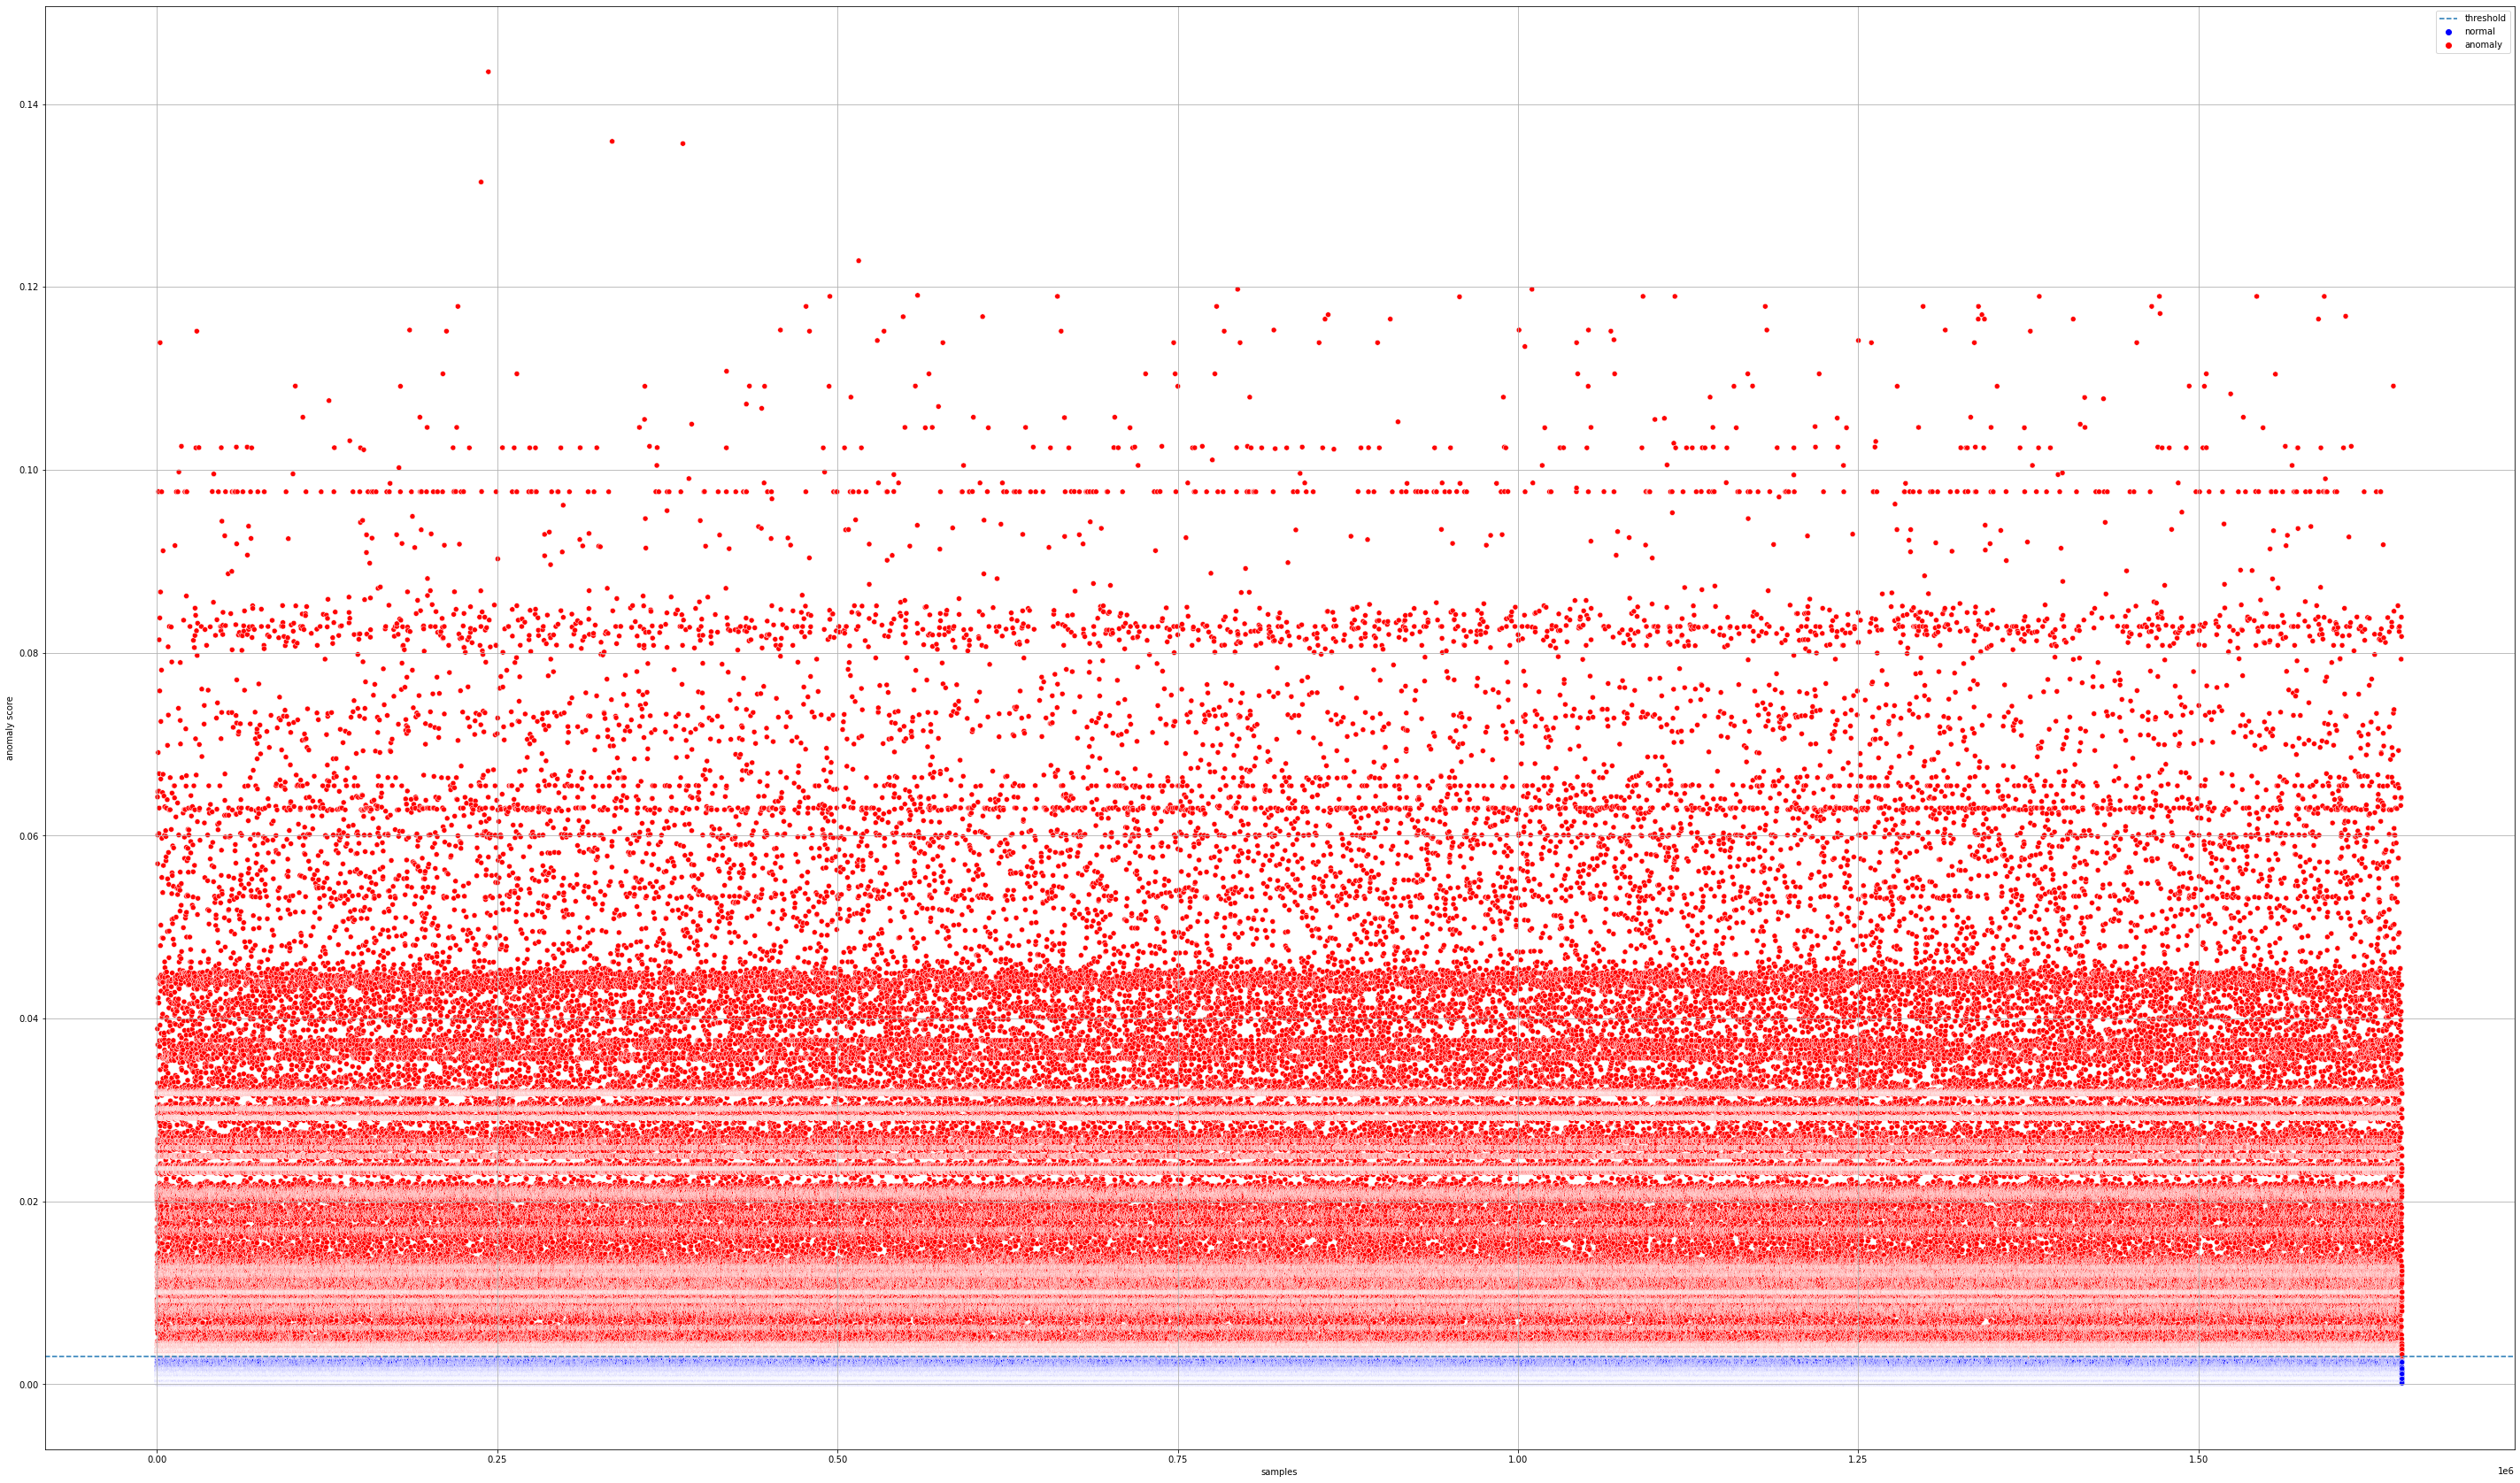

In [ ]:
def get_loss(x):
  if x > 0.003 : 
    return 1
  else : 
    return 0
loss_df = pd.Series(total_loss1)
loss_df2 = loss_df.apply(get_loss)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50,30))
sns.scatterplot(x=np.arange(0, len(loss_df)), y= loss_df, hue=['normal' if i==0 else 'anomaly' for i in loss_df2],
                palette=['blue', 'red'], legend='full')
plt.axhline(y = 0.003, linestyle='--', label='threshold')
plt.xlabel('samples')
plt.ylabel('anomaly score')
plt.legend()
plt.grid()
plt.show()

------

# Feature Selection

In [ ]:
# !pip install eli5
# !pip install catboost

In [ ]:
# !pip install lightgbm

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
final_df

,0,6,17,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1,0,0,9.386810e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.469340,0.000002,0.469341,0.469340
1,1,0,0,9.386789e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.469339,0.000002,0.469340,0.469339
2,1,0,0,9.386552e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.469328,0.000004,0.469329,0.469326
3,0,1,0,5.378304e-02,0.000045,0.000081,8.580817e-06,1.453693e-05,0.011546,0.0,...,0.000019,0.571429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0,1,0,7.336721e-02,0.000042,0.000089,7.915959e-06,1.412762e-05,0.011546,0.0,...,0.000019,0.571429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247867,1,0,0,6.502917e-03,0.000013,0.000024,3.670567e-07,8.378079e-07,0.000822,0.0,...,0.000003,0.357143,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8247868,0,1,0,2.447725e-02,0.000029,0.000057,7.950587e-06,1.011125e-05,0.010506,0.0,...,0.000016,0.357143,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8247869,0,1,0,1.130108e-03,0.000006,0.000008,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.357143,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8247870,0,1,0,2.166667e-07,0.000003,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.357143,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [ ]:
X_normal

,0,6,17,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1,0,0,9.386810e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.469340,0.000002,0.469341,0.469340
1,1,0,0,9.386789e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.469339,0.000002,0.469340,0.469339
2,1,0,0,9.386552e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.469328,0.000004,0.469329,0.469326
3,0,1,0,5.378304e-02,0.000045,0.000081,8.580817e-06,1.453693e-05,0.011546,0.0,...,0.000019,0.571429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0,1,0,7.336721e-02,0.000042,0.000089,7.915959e-06,1.412762e-05,0.011546,0.0,...,0.000019,0.571429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247867,1,0,0,6.502917e-03,0.000013,0.000024,3.670567e-07,8.378079e-07,0.000822,0.0,...,0.000003,0.357143,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8247868,0,1,0,2.447725e-02,0.000029,0.000057,7.950587e-06,1.011125e-05,0.010506,0.0,...,0.000016,0.357143,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8247869,0,1,0,1.130108e-03,0.000006,0.000008,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.357143,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8247870,0,1,0,2.166667e-07,0.000003,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.000000,0.357143,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [ ]:
y_normal

0          0
1          0
2          0
3          0
4          0
          ..
8247867    0
8247868    0
8247869    0
8247870    0
8247871    0
Name: Type, Length: 6077129, dtype: int64

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# X = udp.drop(columns=['Dst Port', 'Label', 'Type', 'Protocol'])
# y = udp['Type']
# y_ml = udp['Label']

# # scale
# mm = MinMaxScaler()
# X_mm = mm.fit_transform(X)

In [ ]:
X_abnormal

,0,6,17,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
94,0,1,0,9.386767e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.469338,5.682940e-07,0.469339,0.469338
95,0,1,0,9.386762e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.469338,1.863259e-08,0.469338,0.469338
96,0,1,0,9.386710e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.469336,6.586621e-06,0.469338,0.469333
97,0,1,0,9.386233e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.469312,3.074377e-06,0.469313,0.469310
98,0,1,0,9.386363e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.469318,1.947106e-06,0.469319,0.469317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8211121,0,1,0,2.750000e-07,0.000000,0.000008,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.357143,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000
8211122,0,1,0,2.233333e-06,0.000000,0.000008,2.908752e-07,3.709378e-07,0.000652,0.028767,...,0.0,0.142857,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000
8211123,0,1,0,9.833333e-06,0.000000,0.000008,2.770240e-07,8.889717e-07,0.000621,0.027397,...,0.0,0.142857,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000
8211124,0,1,0,8.583333e-06,0.000000,0.000008,2.770240e-07,8.889717e-07,0.000621,0.027397,...,0.0,0.142857,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000


In [ ]:
temp = pd.DataFrame(y_abnormal)
temp

,Type
94,1
95,1
96,1
97,1
98,1
...,...
8211121,1
8211122,1
8211123,1
8211124,1


In [ ]:
X_abnormal['Type'] = temp['Type']
X_abnormal['Label'] = Abnormal['Label']
X_abnormal

<ipython-input-25-2b41658284d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_abnormal['Type'] = temp['Type']
<ipython-input-25-2b41658284d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_abnormal['Label'] = Abnormal['Label']


,0,6,17,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Label
94,0,1,0,9.386767e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.469338,5.682940e-07,0.469339,0.469338,1,FTP-BruteForce
95,0,1,0,9.386762e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.469338,1.863259e-08,0.469338,0.469338,1,FTP-BruteForce
96,0,1,0,9.386710e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.469336,6.586621e-06,0.469338,0.469333,1,FTP-BruteForce
97,0,1,0,9.386233e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.469312,3.074377e-06,0.469313,0.469310,1,FTP-BruteForce
98,0,1,0,9.386363e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.469318,1.947106e-06,0.469319,0.469317,1,FTP-BruteForce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8211121,0,1,0,2.750000e-07,0.000000,0.000008,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,1,Infilteration
8211122,0,1,0,2.233333e-06,0.000000,0.000008,2.908752e-07,3.709378e-07,0.000652,0.028767,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,1,Infilteration
8211123,0,1,0,9.833333e-06,0.000000,0.000008,2.770240e-07,8.889717e-07,0.000621,0.027397,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,1,Infilteration
8211124,0,1,0,8.583333e-06,0.000000,0.000008,2.770240e-07,8.889717e-07,0.000621,0.027397,...,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,1,Infilteration


In [ ]:
temp = pd.DataFrame(y_normal)
temp

,Type
0,0
1,0
2,0
3,0
4,0
...,...
8247867,0
8247868,0
8247869,0
8247870,0


In [ ]:
X_normal['Type'] = temp['Type']
X_normal['Label'] = Normal['Label']
X_normal

<ipython-input-27-216c4c6dfbe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_normal['Type'] = temp['Type']
<ipython-input-27-216c4c6dfbe5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_normal['Label'] = Normal['Label']


,0,6,17,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Label
0,1,0,0,9.386810e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.469340,0.000002,0.469341,0.469340,0,Benign
1,1,0,0,9.386789e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.469339,0.000002,0.469340,0.469339,0,Benign
2,1,0,0,9.386552e-01,0.000006,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.469328,0.000004,0.469329,0.469326,0,Benign
3,0,1,0,5.378304e-02,0.000045,0.000081,8.580817e-06,1.453693e-05,0.011546,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,Benign
4,0,1,0,7.336721e-02,0.000042,0.000089,7.915959e-06,1.412762e-05,0.011546,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247867,1,0,0,6.502917e-03,0.000013,0.000024,3.670567e-07,8.378079e-07,0.000822,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,Benign
8247868,0,1,0,2.447725e-02,0.000029,0.000057,7.950587e-06,1.011125e-05,0.010506,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,Benign
8247869,0,1,0,1.130108e-03,0.000006,0.000008,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,Benign
8247870,0,1,0,2.166667e-07,0.000003,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,Benign


In [ ]:
# udp_scale = pd.concat([X_mm,y,y_ml],axis=1)

# ML을 위해 정상, 비정상 데이터 맞춰주기
import random 
abnormal_all = X_abnormal
normal_all = X_normal
normal_idx = random.sample(list(normal_all.index),2170743)
normal_all_sample = normal_all.loc[normal_idx,:]

# X,y 분리
total_data_ml = pd.concat([normal_all_sample,abnormal_all])
total_train = total_data_ml.drop(['Type','Label'],axis=1)
total_test = total_data_ml['Label']

# 라벨 인코더 
le = LabelEncoder()
y_ml = le.fit_transform(total_test)

X_train,X_test,y_train,y_test = train_test_split(total_train, y_ml, test_size=0.2, random_state=13)


In [ ]:
# udp_scale = pd.concat([X_mm,y,y_ml],axis=1)

# # ML을 위해 정상, 비정상 데이터 맞춰주기
# import random 
# abnormal_udp = udp_scale[udp_scale['Type']==1]
# normal_udp = udp_scale[udp_scale['Type']==0]
# normal_idx = random.sample(list(normal_udp.index),2170743)
# normal_udp_sample = normal_udp.loc[normal_idx,:]

# # X,y 분리
# total_data_ml = pd.concat([normal_udp_sample,abnormal_udp])
# total_train = total_data_ml.drop(['Type','Label'],axis=1)
# total_test = total_data_ml['Label']

# # 라벨 인코더 
# le = LabelEncoder()
# y_ml = le.fit_transform(total_test)

# X_train,X_test,y_train,y_test = train_test_split(total_train, y_ml, test_size=0.2, random_state=13)


In [ ]:
model = [RandomForestClassifier(),DecisionTreeClassifier(),LogisticRegression(),LGBMClassifier(),CatBoostClassifier()]

In [ ]:
from tqdm import tqdm
from sklearn.metrics import f1_score, recall_score,precision_score
from sklearn.metrics import classification_report, confusion_matrix

feature_import = pd.DataFrame(columns = ['f1','recall','precision','column'],index=['rf','dt','lr','lgbm','cat'])
name = ['rf','dt','lr','lgbm','cat']
for idx,m in tqdm(enumerate(model)):
  model_fit = m.fit(X_train,y_train)
  y_pred = m.predict(X_test)
  f1 = f1_score(y_test,y_pred,average='micro')
  recall = recall_score(y_test,y_pred,average='micro')
  precision = precision_score(y_test,y_pred,average='micro')

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  
  perm = PermutationImportance(model_fit,scoring='f1_micro',random_state=13).fit(X_test,y_test)

  temp = eli5.explain_weights_df(perm)
  important_cols = temp[temp['weight']>0]['feature'].map(lambda x : int(x.replace('x',''))).values
  #print(important_cols)
  column = X_train.columns[important_cols].values
  #print(column)
  
  feature_import.loc[name[idx]] = [f1,recall,precision,column]

0it [00:00, ?it/s]

[[344996  13948      4      1  36862     36    536  26429   2812    157
    4151   1047      0   3586]
 [ 30592  24707      1      0   1441      0     34      4      0     10
     214    249      0    156]
 [    67      0      0      0     42      0      0      0      0      0
       1      0      0      0]
 [    23      0      0      0     19      0      0      0      0      0
       0      0      0      0]
 [ 81273    813      1      0  50514      0    271      8      0     84
    2229     56      0   1790]
 [   347      0      0      0      0     12      0      0      0      0
       0      0      0      0]
 [  6498     80      0      0   1015      0    173      1      0     32
     311      5      0    203]
 [  8763      0      0      0      0      0      0  72629  10979      0
       0      0      0      0]
 [  9092      1      0      0      0      0      0   1094  17635      0
       0      0      0      0]
 [  1738     13      0      0    268      0     45      0      0     11
 

C:\Users\user\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:993: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)
1it [3:52:29, 13949.96s/it]

[[309277  19390     76     29  45299    264   2654  25622   4721    730
    9917   7575      3   9008]
 [ 27161  24341      1      0   3488      0    177      6      7     48
     760    755      0    664]
 [    62      1      6      0     38      0      0      0      0      0
       2      0      0      1]
 [    26      0      0      3     13      0      0      0      0      0
       0      0      0      0]
 [ 69550   3246     50     17  50956      0   1184      3     14    358
    6134    310      4   5213]
 [   335      0      0      0      0     24      0      0      0      0
       0      0      0      0]
 [  4700    239      0      0   1659      0    418      0      0    110
     623     22      0    547]
 [ 12329      0      0      0      5      0      0  69560  10464      0
       1     11      0      1]
 [  6715      2      0      0      6      0      0   3651  17446      0
       2      0      0      0]
 [  1252     55      0      1    462      0     99      0      0     41
 

C:\Users\user\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:993: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)
2it [4:01:35, 6064.92s/it] C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[375296    155      0      0  26719      0      0  27253   2869      0
       0   2263      0     10]
 [ 53592    286      0      0   2359      0      0    590    370      0
       0    211      0      0]
 [   108      0      0      0      2      0      0      0      0      0
       0      0      0      0]
 [    38      0      0      0      4      0      0      0      0      0
       0      0      0      0]
 [112854     10      0      0  22569      0      0   1510     23      0
       0     64      0      9]
 [   359      0      0      0      0      0      0      0      0      0
       0      0      0      0]
 [  7237      0      0      0    961      0      0    117      1      0
       0      2      0      0]
 [ 20750      8      0      0      3      0      0  68332   3249      0
       0     29      0      0]
 [ 24228      0      0      0      3      0      0      0   3591      0
       0      0      0      0]
 [  1979      0      0      0    236      0      0     26      0      0
 

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.54      0.86      0.67    434565
           1       0.54      0.00      0.01     57408
           2       0.00      0.00      0.00       110
           3       0.00      0.00      0.00        42
           4       0.35      0.16      0.22    137039
           5       0.00      0.00      0.00       359
           6       0.00      0.00      0.00      8318
           7       0.69      0.74      0.72     92371
           8       0.33      0.13      0.19     27822
           9       0.00      0.00      0.00      2242
          10       0.00      0.00      0.00     38726
          11       0.24      0.03      0.05     31957
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00     37323

    accuracy                           0.54    868298
   macro avg       0.19      0.14      0.13    868298
weighted avg       0.46      0.54      0.45    868298



C:\Users\user\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:993: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)
3it [4:07:50, 3466.74s/it]

[[334870  13903    209    274  32087    443    929  29639   6853    958
    4595   6179    176   3450]
 [ 33130  21025     46     20   1569     37    111    535    253     20
     262    111      6    283]
 [    58      0      2      0     46      0      0      0      0      0
       4      0      0      0]
 [    21      0      0      0     19      0      0      0      0      0
       1      0      0      1]
 [ 90996   1438    103    159  36761     21    492   1248    397    537
    3357     77     80   1373]
 [   297      0      0      0     21      9      0      0      1      2
       1     22      0      6]
 [  6893    116      0      4    656      0     87     90     40     75
     247      6      0    104]
 [  4655     10      4      0   2586      2     24  76782   8137      3
      42      7      0    119]
 [  2191      6      0      0   1538      2      0   7404  16597      0
       0      3      0     81]
 [  1796     28      3      1    183      0     35     21      6     22
 

C:\Users\user\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:993: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)
4it [5:01:48, 3376.47s/it]

Learning rate set to 0.119922
0:	learn: 2.0498149	total: 6.72s	remaining: 1h 51m 50s
1:	learn: 1.8336982	total: 13.2s	remaining: 1h 49m 30s
2:	learn: 1.6911059	total: 19.2s	remaining: 1h 46m 9s
3:	learn: 1.5806151	total: 25.5s	remaining: 1h 45m 56s
4:	learn: 1.4965649	total: 31.8s	remaining: 1h 45m 24s
5:	learn: 1.4287604	total: 38.1s	remaining: 1h 45m 4s
6:	learn: 1.3731852	total: 44.2s	remaining: 1h 44m 28s
7:	learn: 1.3279131	total: 50.2s	remaining: 1h 43m 42s
8:	learn: 1.2862018	total: 56.4s	remaining: 1h 43m 31s
9:	learn: 1.2546931	total: 1m 2s	remaining: 1h 43m 19s
10:	learn: 1.2265245	total: 1m 8s	remaining: 1h 43m
11:	learn: 1.2032858	total: 1m 14s	remaining: 1h 42m 24s
12:	learn: 1.1816814	total: 1m 20s	remaining: 1h 42m 17s
13:	learn: 1.1640682	total: 1m 26s	remaining: 1h 42m 4s
14:	learn: 1.1479799	total: 1m 32s	remaining: 1h 41m 43s
15:	learn: 1.1361805	total: 1m 38s	remaining: 1h 40m 56s
16:	learn: 1.1233926	total: 1m 43s	remaining: 1h 40m 11s
17:	learn: 1.1126760	total: 1

144:	learn: 0.9533035	total: 13m 17s	remaining: 1h 18m 19s
145:	learn: 0.9531630	total: 13m 22s	remaining: 1h 18m 12s
146:	learn: 0.9529633	total: 13m 27s	remaining: 1h 18m 7s
147:	learn: 0.9527277	total: 13m 33s	remaining: 1h 18m 1s
148:	learn: 0.9524617	total: 13m 38s	remaining: 1h 17m 56s
149:	learn: 0.9520601	total: 13m 43s	remaining: 1h 17m 49s
150:	learn: 0.9519758	total: 13m 49s	remaining: 1h 17m 41s
151:	learn: 0.9519017	total: 13m 54s	remaining: 1h 17m 34s
152:	learn: 0.9514635	total: 13m 59s	remaining: 1h 17m 30s
153:	learn: 0.9513009	total: 14m 5s	remaining: 1h 17m 23s
154:	learn: 0.9510403	total: 14m 10s	remaining: 1h 17m 18s
155:	learn: 0.9508672	total: 14m 16s	remaining: 1h 17m 12s
156:	learn: 0.9505402	total: 14m 21s	remaining: 1h 17m 6s
157:	learn: 0.9503166	total: 14m 27s	remaining: 1h 17m
158:	learn: 0.9501989	total: 14m 32s	remaining: 1h 16m 53s
159:	learn: 0.9499497	total: 14m 37s	remaining: 1h 16m 48s
160:	learn: 0.9498284	total: 14m 43s	remaining: 1h 16m 44s
161:	

285:	learn: 0.9325519	total: 26m 3s	remaining: 1h 5m 2s
286:	learn: 0.9324534	total: 26m 8s	remaining: 1h 4m 56s
287:	learn: 0.9323968	total: 26m 13s	remaining: 1h 4m 51s
288:	learn: 0.9323371	total: 26m 19s	remaining: 1h 4m 45s
289:	learn: 0.9322982	total: 26m 24s	remaining: 1h 4m 39s
290:	learn: 0.9322506	total: 26m 30s	remaining: 1h 4m 34s
291:	learn: 0.9321472	total: 26m 35s	remaining: 1h 4m 28s
292:	learn: 0.9320376	total: 26m 41s	remaining: 1h 4m 23s
293:	learn: 0.9319415	total: 26m 46s	remaining: 1h 4m 17s
294:	learn: 0.9318440	total: 26m 52s	remaining: 1h 4m 13s
295:	learn: 0.9316969	total: 26m 57s	remaining: 1h 4m 8s
296:	learn: 0.9315429	total: 27m 3s	remaining: 1h 4m 2s
297:	learn: 0.9315080	total: 27m 8s	remaining: 1h 3m 56s
298:	learn: 0.9314714	total: 27m 13s	remaining: 1h 3m 50s
299:	learn: 0.9314015	total: 27m 19s	remaining: 1h 3m 45s
300:	learn: 0.9313477	total: 27m 24s	remaining: 1h 3m 40s
301:	learn: 0.9312875	total: 27m 30s	remaining: 1h 3m 34s
302:	learn: 0.9310725

432:	learn: 0.9227298	total: 39m 30s	remaining: 51m 43s
433:	learn: 0.9226432	total: 39m 35s	remaining: 51m 38s
434:	learn: 0.9226282	total: 39m 41s	remaining: 51m 32s
435:	learn: 0.9225998	total: 39m 46s	remaining: 51m 26s
436:	learn: 0.9225149	total: 39m 51s	remaining: 51m 21s
437:	learn: 0.9224865	total: 39m 57s	remaining: 51m 15s
438:	learn: 0.9223803	total: 40m 2s	remaining: 51m 10s
439:	learn: 0.9223409	total: 40m 8s	remaining: 51m 4s
440:	learn: 0.9222669	total: 40m 13s	remaining: 50m 59s
441:	learn: 0.9222502	total: 40m 18s	remaining: 50m 53s
442:	learn: 0.9222113	total: 40m 24s	remaining: 50m 48s
443:	learn: 0.9221505	total: 40m 30s	remaining: 50m 43s
444:	learn: 0.9221406	total: 40m 35s	remaining: 50m 37s
445:	learn: 0.9221099	total: 40m 40s	remaining: 50m 31s
446:	learn: 0.9220517	total: 40m 46s	remaining: 50m 26s
447:	learn: 0.9219878	total: 40m 51s	remaining: 50m 20s
448:	learn: 0.9218380	total: 40m 57s	remaining: 50m 15s
449:	learn: 0.9217705	total: 41m 2s	remaining: 50m 

580:	learn: 0.9158660	total: 52m 51s	remaining: 38m 7s
581:	learn: 0.9158365	total: 52m 56s	remaining: 38m 1s
582:	learn: 0.9158105	total: 53m 1s	remaining: 37m 55s
583:	learn: 0.9157751	total: 53m 7s	remaining: 37m 50s
584:	learn: 0.9157251	total: 53m 12s	remaining: 37m 44s
585:	learn: 0.9157020	total: 53m 18s	remaining: 37m 39s
586:	learn: 0.9156874	total: 53m 23s	remaining: 37m 33s
587:	learn: 0.9156319	total: 53m 28s	remaining: 37m 28s
588:	learn: 0.9155583	total: 53m 34s	remaining: 37m 22s
589:	learn: 0.9154877	total: 53m 39s	remaining: 37m 17s
590:	learn: 0.9154415	total: 53m 45s	remaining: 37m 11s
591:	learn: 0.9154024	total: 53m 50s	remaining: 37m 6s
592:	learn: 0.9153707	total: 53m 56s	remaining: 37m 1s
593:	learn: 0.9153623	total: 54m 1s	remaining: 36m 55s
594:	learn: 0.9153339	total: 54m 6s	remaining: 36m 50s
595:	learn: 0.9153024	total: 54m 12s	remaining: 36m 44s
596:	learn: 0.9152658	total: 54m 17s	remaining: 36m 38s
597:	learn: 0.9152425	total: 54m 22s	remaining: 36m 33s


726:	learn: 0.9108754	total: 1h 6m 1s	remaining: 24m 47s
727:	learn: 0.9108508	total: 1h 6m 7s	remaining: 24m 42s
728:	learn: 0.9107965	total: 1h 6m 12s	remaining: 24m 36s
729:	learn: 0.9107663	total: 1h 6m 18s	remaining: 24m 31s
730:	learn: 0.9107398	total: 1h 6m 24s	remaining: 24m 26s
731:	learn: 0.9107037	total: 1h 6m 29s	remaining: 24m 20s
732:	learn: 0.9106873	total: 1h 6m 34s	remaining: 24m 15s
733:	learn: 0.9106638	total: 1h 6m 40s	remaining: 24m 9s
734:	learn: 0.9106228	total: 1h 6m 45s	remaining: 24m 4s
735:	learn: 0.9105815	total: 1h 6m 51s	remaining: 23m 58s
736:	learn: 0.9105741	total: 1h 6m 56s	remaining: 23m 53s
737:	learn: 0.9105554	total: 1h 7m 1s	remaining: 23m 47s
738:	learn: 0.9105217	total: 1h 7m 7s	remaining: 23m 42s
739:	learn: 0.9104835	total: 1h 7m 12s	remaining: 23m 36s
740:	learn: 0.9104631	total: 1h 7m 18s	remaining: 23m 31s
741:	learn: 0.9104047	total: 1h 7m 23s	remaining: 23m 26s
742:	learn: 0.9103174	total: 1h 7m 29s	remaining: 23m 20s
743:	learn: 0.910284

867:	learn: 0.9070674	total: 1h 18m 43s	remaining: 11m 58s
868:	learn: 0.9070416	total: 1h 18m 49s	remaining: 11m 52s
869:	learn: 0.9070232	total: 1h 18m 54s	remaining: 11m 47s
870:	learn: 0.9069931	total: 1h 18m 59s	remaining: 11m 41s
871:	learn: 0.9069565	total: 1h 19m 5s	remaining: 11m 36s
872:	learn: 0.9069426	total: 1h 19m 10s	remaining: 11m 31s
873:	learn: 0.9069267	total: 1h 19m 15s	remaining: 11m 25s
874:	learn: 0.9068922	total: 1h 19m 21s	remaining: 11m 20s
875:	learn: 0.9068702	total: 1h 19m 26s	remaining: 11m 14s
876:	learn: 0.9068341	total: 1h 19m 32s	remaining: 11m 9s
877:	learn: 0.9067936	total: 1h 19m 37s	remaining: 11m 3s
878:	learn: 0.9067864	total: 1h 19m 42s	remaining: 10m 58s
879:	learn: 0.9067692	total: 1h 19m 48s	remaining: 10m 52s
880:	learn: 0.9067442	total: 1h 19m 53s	remaining: 10m 47s
881:	learn: 0.9067311	total: 1h 19m 58s	remaining: 10m 42s
882:	learn: 0.9067142	total: 1h 20m 4s	remaining: 10m 36s
883:	learn: 0.9067026	total: 1h 20m 9s	remaining: 10m 31s
88

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.83      0.70    434565
           1       0.63      0.40      0.49     57408
           2       0.00      0.00      0.00       110
           3       0.00      0.00      0.00        42
           4       0.57      0.29      0.39    137039
           5       0.75      0.01      0.02       359
           6       0.68      0.00      0.00      8318
           7       0.72      0.80      0.76     92371
           8       0.54      0.87      0.66     27822
           9       1.00      0.00      0.00      2242
          10       0.61      0.05      0.10     38726
          11       0.55      0.05      0.09     31957
          12       0.00      0.00      0.00        16
          13       0.81      0.14      0.23     37323

    accuracy                           0.61    868298
   macro avg       0.53      0.25      0.25    868298
weighted avg       0.62      0.61      0.56    868298



C:\Users\user\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:993: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)
5it [6:44:09, 4849.86s/it]


In [ ]:
feature_import

,f1,recall,precision,column
rf,0.60268,0.60268,0.60268,"[Init Fwd Win Byts, 6, Fwd Seg Size Min, 17, E..."
dt,0.565153,0.565153,0.565153,"[Init Fwd Win Byts, Init Bwd Win Byts, Fwd Seg..."
lr,0.542362,0.542362,0.542362,"[ACK Flag Cnt, Fwd Seg Size Min, Init Fwd Win ..."
lgbm,0.574432,0.574432,0.574432,"[Fwd Pkts/s, Flow IAT Max, Flow IAT Mean, Fwd ..."
cat,0.6111,0.6111,0.6111,"[Init Fwd Win Byts, Fwd Seg Size Min, Init Bwd..."


In [ ]:
feature_import.loc['rf']['column']

array(['Init Fwd Win Byts', '6', 'Fwd Seg Size Min', '17', 'ECE Flag Cnt',
       'Bwd IAT Min', 'Idle Max', 'RST Flag Cnt', 'Fwd IAT Max',
       'Bwd Header Len', 'Init Bwd Win Byts', 'Idle Mean', 'Bwd IAT Max',
       'Fwd IAT Std', 'Fwd Pkt Len Std', 'Bwd IAT Tot', 'Bwd IAT Std',
       'Fwd IAT Min', 'Idle Min', 'Fwd Header Len', 'Active Min',
       'Fwd IAT Mean', 'Bwd IAT Mean', 'Bwd Pkt Len Std', 'URG Flag Cnt',
       'Idle Std', 'Active Std', 'Active Mean', 'Fwd Act Data Pkts',
       'Fwd PSH Flags', '0'], dtype=object)

In [ ]:
feature_import.loc['dt']['column']

array(['Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Fwd IAT Mean', '6', 'Flow Pkts/s', 'Bwd Seg Size Avg',
       'Flow IAT Max', 'Flow Duration', 'Flow IAT Std', 'Bwd Pkt Len Max',
       'Pkt Len Mean', 'Fwd Pkts/s', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std',
       'Bwd IAT Max', 'Fwd IAT Max', 'Fwd IAT Tot', 'Fwd IAT Min',
       'Flow IAT Mean', 'Fwd IAT Std', 'Flow Byts/s', 'Bwd Header Len',
       'Pkt Len Std', 'Bwd IAT Std', 'Bwd Pkts/s', 'TotLen Bwd Pkts',
       'Bwd IAT Mean', 'Bwd IAT Tot', 'Pkt Len Var', 'Flow IAT Min',
       'RST Flag Cnt', 'Bwd IAT Min', 'Fwd Pkt Len Mean', 'Pkt Size Avg',
       'Fwd Pkt Len Max', 'Pkt Len Max', 'Fwd Header Len',
       'Fwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Idle Mean', 'Idle Max',
       'Idle Min', 'URG Flag Cnt', 'Bwd Pkt Len Min', 'Active Min',
       'PSH Flag Cnt', 'ECE Flag Cnt', 'Active Mean', 'Subflow Bwd Byts',
       'Fwd Pkt Len Min', 'SYN Flag Cnt', 'Active Max', 'Tot Fwd Pkts',
       'Idle Std', 'P

In [ ]:
feature_import.loc['lr']['column']

array(['ACK Flag Cnt', 'Fwd Seg Size Min', 'Init Fwd Win Byts',
       'PSH Flag Cnt', 'Init Bwd Win Byts', 'Bwd IAT Tot',
       'Flow Duration', '17', 'Fwd IAT Tot', 'Flow IAT Max', 'Bwd Pkts/s',
       '6', 'Fwd IAT Max', 'Flow IAT Min', 'Flow IAT Mean',
       'URG Flag Cnt', 'Idle Max', 'Bwd IAT Max', 'Idle Mean', 'Idle Min',
       'Fwd IAT Mean', 'Bwd Pkt Len Mean', 'Bwd Seg Size Avg',
       'Fwd PSH Flags', 'Pkt Size Avg', 'SYN Flag Cnt', '0',
       'Bwd IAT Std', 'Pkt Len Mean', 'Bwd IAT Mean', 'Fwd IAT Std',
       'FIN Flag Cnt', 'Flow IAT Std', 'Bwd Pkt Len Std', 'Bwd IAT Min',
       'CWE Flag Count', 'Fwd URG Flags', 'Fwd IAT Min', 'Active Max',
       'Bwd Pkt Len Min', 'Active Mean', 'Pkt Len Std',
       'Subflow Fwd Pkts', 'Pkt Len Var', 'TotLen Bwd Pkts',
       'Subflow Bwd Byts', 'Tot Fwd Pkts', 'Bwd Header Len',
       'TotLen Fwd Pkts', 'Flow Byts/s'], dtype=object)

In [ ]:
feature_import.loc['lgbm']['column']

array(['Fwd Pkts/s', 'Flow IAT Max', 'Flow IAT Mean', 'Fwd IAT Tot',
       'Flow IAT Min', 'Flow Pkts/s', 'Fwd IAT Min', 'Init Fwd Win Byts',
       'Fwd IAT Mean', 'Fwd IAT Max', 'Flow Duration', 'Fwd Header Len',
       'Bwd Pkt Len Std', 'Bwd Pkts/s', 'Init Bwd Win Byts',
       'Flow IAT Std', 'Pkt Size Avg', 'Pkt Len Mean', 'Bwd IAT Std',
       'Pkt Len Max', 'Fwd Seg Size Min', 'Fwd Pkt Len Std',
       'Fwd Pkt Len Mean', 'Flow Byts/s', 'TotLen Fwd Pkts',
       'Fwd Pkt Len Max', 'Fwd IAT Std', 'Bwd IAT Tot', 'Fwd Pkt Len Min',
       '6', 'Tot Fwd Pkts', 'Bwd Header Len', 'Tot Bwd Pkts',
       'TotLen Bwd Pkts', 'Pkt Len Std', 'Bwd IAT Mean', 'Bwd IAT Max',
       'Idle Max', 'Pkt Len Min', '17', 'Fwd Act Data Pkts',
       'Bwd IAT Min', 'ECE Flag Cnt', 'Idle Mean', 'Bwd Pkt Len Max',
       'ACK Flag Cnt', 'RST Flag Cnt', 'Pkt Len Var', 'Idle Min',
       'Bwd Pkt Len Min', 'Down/Up Ratio', 'Active Mean', 'URG Flag Cnt',
       'Bwd Pkt Len Mean', 'Idle Std', 'Fwd PSH Fla

In [ ]:
feature_import.loc['cat']['column']

array(['Init Fwd Win Byts', 'Fwd Seg Size Min', 'Init Bwd Win Byts',
       'Fwd IAT Min', 'Fwd Pkts/s', 'Fwd Pkt Len Max', 'Flow IAT Min',
       'Flow Byts/s', 'Fwd Header Len', 'Bwd Pkts/s', 'Pkt Len Max',
       'Flow IAT Max', '6', 'Bwd Header Len', 'Fwd IAT Max',
       'Bwd IAT Min', '17', 'Flow Duration', 'Pkt Len Mean',
       'ECE Flag Cnt', 'Idle Max', 'RST Flag Cnt', 'Fwd IAT Tot',
       'Bwd IAT Max', 'Bwd IAT Tot', 'Idle Min', 'Fwd IAT Mean',
       'Fwd Pkt Len Std', 'TotLen Fwd Pkts', 'Idle Mean', 'Flow Pkts/s',
       'Fwd IAT Std', 'Bwd Pkt Len Max', 'Pkt Len Var', 'Pkt Size Avg',
       'Bwd Pkt Len Std', 'Fwd Pkt Len Mean', 'Flow IAT Std',
       'Active Min', 'Bwd IAT Std', 'URG Flag Cnt', 'Bwd Pkt Len Min',
       'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Pkt Len Min',
       'Bwd Seg Size Avg', 'Flow IAT Mean', 'Pkt Len Std',
       'Bwd Pkt Len Mean', 'TotLen Bwd Pkts', 'Subflow Fwd Pkts',
       'ACK Flag Cnt', 'Subflow Bwd Pkts', 'PSH Flag Cnt', 'Bwd IAT Mean'

----

# RandomForest

In [ ]:
rf_cols = ['Init Fwd Win Byts', '6', 'Fwd Seg Size Min', '17', 'ECE Flag Cnt',
       'Bwd IAT Min', 'Idle Max', 'RST Flag Cnt', 'Fwd IAT Max',
       'Bwd Header Len', 'Init Bwd Win Byts', 'Idle Mean', 'Bwd IAT Max',
       'Fwd IAT Std', 'Fwd Pkt Len Std', 'Bwd IAT Tot', 'Bwd IAT Std',
       'Fwd IAT Min', 'Idle Min', 'Fwd Header Len', 'Active Min',
       'Fwd IAT Mean', 'Bwd IAT Mean', 'Bwd Pkt Len Std', 'URG Flag Cnt',
       'Idle Std', 'Active Std', 'Active Mean', 'Fwd Act Data Pkts',
       'Fwd PSH Flags', '0']

In [ ]:
# 학습 : 정상 607만개 
# 테스트 : 정상 121만개, 비정상 217만개 
normal_X = normal_all[rf_cols]
normal_y = normal_all['Type']

from sklearn.model_selection import train_test_split
normal_train_X ,normal_test_X, normal_train_y, normal_test_y = train_test_split(normal_X, normal_y, test_size=0.2, random_state=13)


abnormal_X = abnormal_all[rf_cols]
abnormal_y = abnormal_all['Type']


test_X = pd.concat([normal_test_X,abnormal_X])
test_y = pd.concat([normal_test_y,abnormal_y])

In [ ]:
test_X

,Init Fwd Win Byts,6,Fwd Seg Size Min,17,ECE Flag Cnt,Bwd IAT Min,Idle Max,RST Flag Cnt,Fwd IAT Max,Bwd Header Len,...,Fwd IAT Mean,Bwd IAT Mean,Bwd Pkt Len Std,URG Flag Cnt,Idle Std,Active Std,Active Mean,Fwd Act Data Pkts,Fwd PSH Flags,0
2763860,0.000000,1,0.142857,0,0.0,5.846000e-04,0.000000,0.0,0.000583,0.000006,...,0.000583,0.000585,0.000000,0.0,0.000000,0.000000,0.00000,0.000003,0.0,0
3495268,0.013947,0,0.357143,1,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000008,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000,0.0,0
3890350,0.954681,1,0.357143,0,0.0,0.000000e+00,0.716215,0.0,0.716215,0.000000,...,0.716216,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0
963398,0.000000,0,0.142857,1,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000003,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0
1282601,0.125015,0,0.357143,1,0.0,8.333333e-09,0.084915,0.0,0.085252,0.000205,...,0.056676,0.054802,0.202288,0.0,0.000683,0.000324,0.00042,0.000045,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8211121,0.014450,1,0.357143,0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000008,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0
8211122,0.000000,1,0.142857,0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000003,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0
8211123,0.000000,1,0.142857,0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000003,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0
8211124,0.000000,1,0.142857,0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000003,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0


In [ ]:
abnormal_X

,Init Fwd Win Byts,6,Fwd Seg Size Min,17,ECE Flag Cnt,Bwd IAT Min,Idle Max,RST Flag Cnt,Fwd IAT Max,Bwd Header Len,...,Fwd IAT Mean,Bwd IAT Mean,Bwd Pkt Len Std,URG Flag Cnt,Idle Std,Active Std,Active Mean,Fwd Act Data Pkts,Fwd PSH Flags,0
94,0.00000,1,0.000000,0,0.0,0.0,0.469339,0.0,0.469339,0.000000,...,0.469338,0.0,0.0,0.0,5.682940e-07,0.0,0.0,0.0,0.0,0
95,0.00000,1,0.000000,0,0.0,0.0,0.469338,0.0,0.469338,0.000000,...,0.469338,0.0,0.0,0.0,1.863259e-08,0.0,0.0,0.0,0.0,0
96,0.00000,1,0.000000,0,0.0,0.0,0.469338,0.0,0.469338,0.000000,...,0.469336,0.0,0.0,0.0,6.586621e-06,0.0,0.0,0.0,0.0,0
97,0.00000,1,0.000000,0,0.0,0.0,0.469313,0.0,0.469313,0.000000,...,0.469312,0.0,0.0,0.0,3.074377e-06,0.0,0.0,0.0,0.0,0
98,0.00000,1,0.000000,0,0.0,0.0,0.469319,0.0,0.469319,0.000000,...,0.469318,0.0,0.0,0.0,1.947106e-06,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8211121,0.01445,1,0.357143,0,0.0,0.0,0.000000,0.0,0.000000,0.000008,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0
8211122,0.00000,1,0.142857,0,0.0,0.0,0.000000,0.0,0.000000,0.000003,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0
8211123,0.00000,1,0.142857,0,0.0,0.0,0.000000,0.0,0.000000,0.000003,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0
8211124,0.00000,1,0.142857,0,0.0,0.0,0.000000,0.0,0.000000,0.000003,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0


In [ ]:
normal_X

,Init Fwd Win Byts,6,Fwd Seg Size Min,17,ECE Flag Cnt,Bwd IAT Min,Idle Max,RST Flag Cnt,Fwd IAT Max,Bwd Header Len,...,Fwd IAT Mean,Bwd IAT Mean,Bwd Pkt Len Std,URG Flag Cnt,Idle Std,Active Std,Active Mean,Fwd Act Data Pkts,Fwd PSH Flags,0
0,0.000000,0,0.000000,0,0.0,0.000000e+00,0.469341,0.0,4.693413e-01,0.000000,...,4.693405e-01,0.000000,0.000000,0.0,0.000002,0.0,0.0,0.000000,0.0,1
1,0.000000,0,0.000000,0,0.0,0.000000e+00,0.469340,0.0,4.693401e-01,0.000000,...,4.693394e-01,0.000000,0.000000,0.0,0.000002,0.0,0.0,0.000000,0.0,1
2,0.000000,0,0.000000,0,0.0,0.000000e+00,0.469329,0.0,4.693294e-01,0.000000,...,4.693276e-01,0.000000,0.000000,0.0,0.000004,0.0,0.0,0.000000,0.0,1
3,1.000000,1,0.571429,0,0.0,4.616667e-06,0.000000,0.0,5.615833e-03,0.000133,...,3.841646e-03,0.005220,0.160535,0.0,0.000000,0.0,0.0,0.000019,0.0,0
4,0.088638,1,0.571429,0,0.0,7.500000e-07,0.000000,0.0,1.606752e-02,0.000146,...,5.643633e-03,0.006430,0.156390,0.0,0.000000,0.0,0.0,0.000019,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247867,0.125015,0,0.357143,0,1.0,6.753167e-04,0.000000,1.0,5.981625e-03,0.000029,...,1.625731e-03,0.002894,0.032642,0.0,0.000000,0.0,0.0,0.000003,0.0,1
8247868,0.125015,1,0.357143,0,1.0,1.866892e-03,0.000000,1.0,1.019680e-02,0.000062,...,2.719695e-03,0.003774,0.185665,0.0,0.000000,0.0,0.0,0.000016,0.0,0
8247869,0.125015,1,0.357143,0,0.0,0.000000e+00,0.000000,0.0,1.129783e-03,0.000013,...,5.650583e-04,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0
8247870,0.003922,1,0.357143,0,0.0,0.000000e+00,0.000000,0.0,2.250000e-07,0.000000,...,2.250000e-07,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0


In [ ]:
test_data_effort = pd.concat([test_X,test_y],axis=1)
test_data_effort = test_data_effort.sample(frac=1)

test_X = test_data_effort.drop('Type',axis=1)
test_y = test_data_effort['Type']

In [ ]:
# reset_index
def get_new_idx(data):
  data = data.reset_index().drop('index',axis=1)
  return data

In [ ]:
from torch.utils.data import DataLoader

len(normal_train_X),len(test_X),len(normal_train_y),len(test_y)
normal_train_X = get_new_idx(normal_train_X)
normal_train_y = get_new_idx(normal_train_y)
tot_test_X = get_new_idx(test_X)
tot_test_y = get_new_idx(test_y)

# to_tensor and dataloader
BATCH_SIZE = 512
train_loader = DataLoader(CustomDataset(normal_train_X, normal_train_y), BATCH_SIZE, shuffle=True)
test_loader = DataLoader(CustomDataset(tot_test_X, tot_test_y), BATCH_SIZE, shuffle=True)

MemoryError: Unable to allocate 1.01 GiB for an array with shape (28, 4861703) and data type float64

In [ ]:
import torch
for data in train_loader:
  BATCH_SIZE, FEATURE_NUM = data[0].shape
  break

print(BATCH_SIZE, FEATURE_NUM)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# AutoEncoder
class AutoEncoder(nn.Module):
  def __init__(self, input_dim, output_dim, code_size=2):
    super(AutoEncoder, self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim

    self.encoder = nn.Sequential(
        nn.Linear(input_dim, code_size),
        nn.BatchNorm1d(2),
        nn.ReLU(),
    )

    self.decoder = nn.Sequential(
        nn.Linear(code_size, output_dim),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [ ]:
# Simple AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = AutoEncoder(input_dim=FEATURE_NUM, 
                    output_dim=FEATURE_NUM).to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
model

In [ ]:
from tqdm import tqdm
from collections import defaultdict
train_losses = []

minimum = float('inf')
dic = defaultdict(int)

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
  running_loss = 0
  model.train()
  for datas in train_loader:
    data, _ = datas
    data = data.to(DEVICE)
    data = data.float()
    # ===================forward=====================
    encoded,decoded = model.forward(data)
    loss = criterion(decoded, data)

    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()

    # Step backwards
    optimizer.step()
    running_loss += loss.item()
  val = running_loss/len(train_loader)
  train_losses.append(val)

  # Early stopping
  if np.round(val,4) <= minimum : 
    minimum = np.round(val,4)
    dic[minimum] += 1
    if dic[minimum] > 3 : 
      break
  # ===================log========================
  print(f'epoch [{epoch + 1}/{num_epochs}], train loss:{val:.4f}')

In [ ]:
torch.save(model,'./ALL_RF_SimpleAE_code8_B512_E10_model_all_total_data.pt')

In [ ]:
model = torch.load('./ALL_RF_SimpleAE_code8_B512_E10_model_all_total_data.pt')

In [ ]:
# code_size = 2
# train_loss collection
from tqdm import tqdm
model.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

In [ ]:
import numpy as np
threshold = np.percentile(train_loss_collection, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
threshold

In [ ]:
# code_size = 2
# model

# threshold
import numpy as np
threshold = list(set(np.percentile(train_loss_collection, range(0, 101, 10))))

from tqdm import tqdm
model.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(test_loader): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try : 
    acc = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)
    test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
  except : 
    continue
  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

In [ ]:
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.legend()
plt.show()

In [ ]:
th = 0.000005
def get_loss(x):
  global th 
  if x > th : 
    return 1
  else : 
    return 0
loss_df = pd.Series(total_loss)
loss_df2 = loss_df.apply(get_loss)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.scatterplot(x=np.arange(0, len(loss_df)), y= loss_df, hue=['normal' if i==0 else 'anomaly' for i in loss_df2],
                palette=['blue', 'red'], legend='full')
plt.axhline(y = th, linestyle='--', label='threshold')
plt.xlabel('samples')
plt.ylabel('anomaly score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
zero_df = pd.DataFrame(zero)
one_df = pd.DataFrame(one)
plt.subplot(1,2,1)
plt.plot(zero_df)
plt.title('Normal Loss')

plt.subplot(1,2,2)
plt.plot(one_df)
plt.title('Abnormal Loss')

plt.show()